## Force and Friction Problem - Constant Force

Consider a mass sliding on a surface. For simplicity, let's constrain the motion to one dimension. At time $t = 0$ the mass is at position $x = x_0$, traveling at velocity $v = v_0$. The mass experiences a frictional force opposite to the direction of motion, proportional to the velocity by a constant factor $R$. There is also a constant external force $F_0$ acting on the mass.

I'm using the [SymPy](http://www.sympy.org/en/index.html) Computer Algebra System and the 
[Python programming language](http://python.org/) to assist me with the math. The rest of this web page consists of mixed blocks of text, Python code, equations, and graphs. If you know math and physics but don't know Python, just skip the code blocks and read the rest.

In [1]:
# These are initial Python imports and commands to set things up.
from IPython.display import display

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import sympy
from sympy import diff, dsolve, Eq, exp, factor, Function, init_printing, simplify, solveset, Symbol, symbols
init_printing()

def get_symbol_from_expr(expr, name):
    for s in expr.atoms(Symbol):
        if s.name == name:
            return s
    raise ValueError("Did not find symbol with name '{0}' in expression.".format(name))

def replace_symbols_in_expr(expr, external_symbols):
    """
    Replace the 'internal' symbols in an expression with symbols of the same name
    that are defined outside of the expression and can be shared between expressions.
    """
    for s in external_symbols:
        expr = expr.subs(get_symbol_from_expr(expr, s.name), s)
    return expr

m, R, t, F0, x0, v0 = symbols('m R t F0 x0 v0')
x = Function('x')
v = Function('v')

Here is the equation describing the problem using Newton's second law of motion.

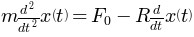

In [2]:
eq = Eq(m * diff(x(t), t, 2), F0 - (R * diff(x(t), t)))
display(eq)
display(Eq(v(t), diff(x(t), t)))

Let's find the equations for position over time $x(t)$ and velocity over time $v(t)$.

In [3]:
sol = dsolve(eq, x(t))
x_expr = sol.args[1]
v_expr = x_expr.diff(t)
display(Eq(x(t), x_expr))
display(Eq(v(t), v_expr))

We have two equations and two unknowns. Let's solve for $C_1$ and $C_2$, given that we know by definition:

$x(0) = x_0$

$v(0) = v_0$

In [4]:
display(Eq(x0, x_expr.subs(t, 0)))
display(Eq(v0, v_expr.subs(t, 0)))

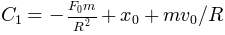

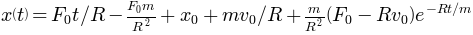

In [5]:
C1, C2 = symbols('C1 C2')
x_expr_temp = replace_symbols_in_expr(x_expr, (C1, C2))
v_expr_temp = replace_symbols_in_expr(v_expr, (C2,))

C2_expr = tuple(solveset(Eq(v0, v_expr_temp.subs(t, 0)), C2))[0]
C2_expr = simplify(C2_expr)
display(Eq(C2, C2_expr))
v_expr_final = v_expr.subs(C2, C2_expr)

x_expr_temp = x_expr_temp.subs(C2, C2_expr)
C1_expr = tuple(solveset(Eq(x0, x_expr_temp.subs(t, 0)), C1))[0]
C1_expr = simplify(C1_expr)
display(Eq(C1, C1_expr))
x_expr_final = x_expr_temp.subs(C1, C1_expr)

display(Eq(x(t), x_expr_final))
display(Eq(v(t), v_expr_final))

Doing some simple checks:

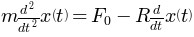

In [6]:
display(Eq(x(0), simplify(x_expr_final.subs(t, 0))))
display(Eq(v(0), simplify(v_expr_final.subs(t, 0))))
display(eq)
left_side = m * x_expr_final.diff(t, 2)
right_side = simplify(F0 - (R * x_expr_final.diff(t)))
Eq(left_side, right_side)

Let's simplify things some more by assuming $x_0 = 0$ and $v_0 = 0$.

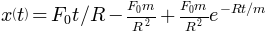

In [7]:
x_expr_0 = x_expr_final.subs({x0: 0, v0: 0})
display(Eq(x(t), x_expr_0))
v_expr_0 = v_expr_final.subs(v0, 0)
display(Eq(v(t), v_expr_0))

Let's do another check, assuming:

$m$ is 1.0 kg

$R$ is 1.0 Newtons / (meters / second)

$F_0$ is 1.0 Newtons

$t$ is 1.0 seconds

In [8]:
data = {m: 1, R: 1, F0: 1, t: 1}
display(Eq(x(1), x_expr_0.subs(data).n()))
display(Eq(v(1), v_expr_0.subs(data).n()))

So far, so good. Now let's change $m$ to be one million kg.

In [9]:
data = {m: 1000000, R: 1, F0: 1, t: 1}
display(Eq(x(1), x_expr_0.subs(data).n()))
display(Eq(v(1), v_expr_0.subs(data).n()))

This makes sense. Pushing a 1 million kg mass with a force of 1 Newton for 1 second isn't going to move it very far or very fast.

In the [next notebook](force-friction-problem-1.ipynb) I tackle the case where the external force applied to the mass is not constant, but varies linearly over time.